https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print(x_train.shape, y_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


In [ ]:
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

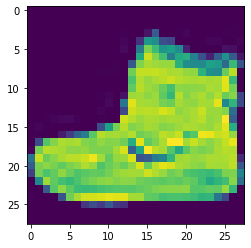

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [ ]:
import numpy as np
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)


In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
datagen = ImageDataGenerator(    
    rotation_range=20,
    horizontal_flip=True)

In [ ]:
datagen.fit(x_train)

In [ ]:
batches=datagen.flow(x_train, y_train, batch_size=32)

In [ ]:
!ls

sample_data


In [ ]:
!mkdir aug

In [ ]:
!ls

aug  sample_data


In [ ]:
batches=datagen.flow(x_train, y_train, batch_size=32, save_to_dir='aug')

In [ ]:
len(x_train)

60000

In [ ]:
len(batches)

1875

In [ ]:
!ls aug

_11653_3579.png  _25527_6906.png  _37893_2953.png  _53935_9424.png
_12675_1647.png  _26647_3816.png  _38071_2269.png  _54420_6764.png
_12853_1385.png  _28209_9306.png  _39179_5073.png  _5453_2573.png
_15948_2768.png  _28848_9549.png  _40511_9384.png  _55553_6514.png
_18117_1710.png  _32427_4310.png  _45504_6641.png  _56461_3482.png
_20448_6649.png  _3263_2746.png   _45513_76.png    _58405_2936.png
_22511_2958.png  _32793_5777.png  _46022_782.png   _59126_4688.png
_2387_1387.png	 _36058_635.png   _48549_8152.png  _7680_3155.png


In [ ]:
x_batch, y_batch = next(batches)

In [ ]:
x_batch.shape

(32, 28, 28, 1)

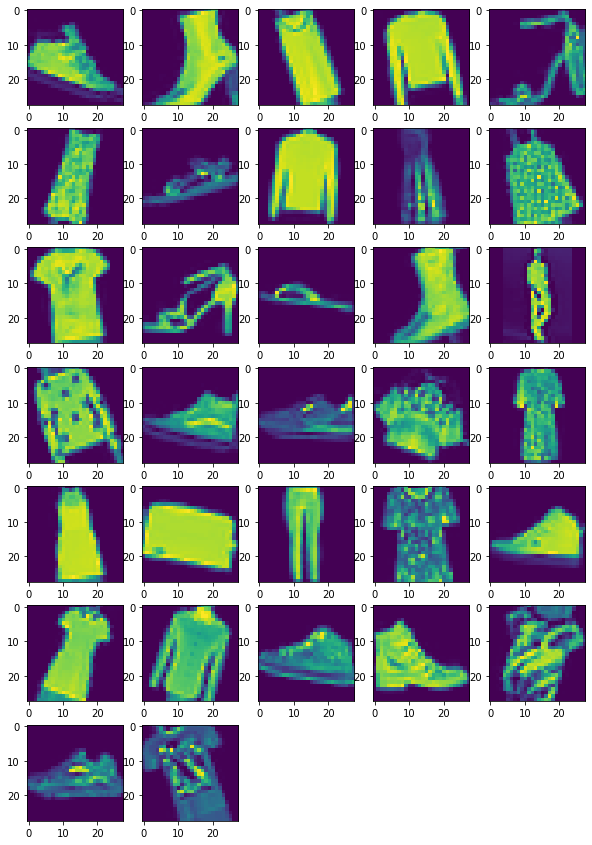

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,15))
for i in range(32):
  fig.add_subplot(7,5,i+1)
  plt.imshow(x_batch[i,:,:,0])

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32,(5,5), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(5,5), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
epochs = 10
histoy = model.fit(datagen.flow(x_train, y_train, batch_size=32),
          epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 49s 9ms/step - loss: 1.2969 - acc: 0.6943 - val_loss: 0.4918 - val_acc: 0.8256
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5151 - acc: 0.8122 - val_loss: 0.4685 - val_acc: 0.8381
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4697 - acc: 0.8280 - val_loss: 0.4337 - val_acc: 0.8529
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4613 - acc: 0.8343 - val_loss: 0.4505 - val_acc: 0.8425
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4453 - acc: 0.8356 - val_loss: 0.4269 - val_acc: 0.8524
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4361 - acc: 0.8414 - val_loss: 0.4824 - val_acc: 0.8468
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4396 - acc: 0.8430 - val_loss: 0.4187 - val_acc: 0.8539
Epoch 8/10
1875/1875 [==============================] -